#Car Price Prediction

Lo primero que se hizo fue importar el archivo "car_price_dataset.csv" utilizando la librería pandas, lo que permitió cargar el conjunto de datos en el entorno de trabajo. Posteriormente, se utilizó el método .head() para visualizar las primeras filas del dataset.

In [5]:
import pandas as pd
data = pd.read_csv("car_price_dataset.csv")
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [6]:
data.size

100000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


Primero, se definieron dos listas de columnas: num_cols para las variables numéricas (como 'Year', 'Engine_Size', 'Mileage' y 'Price') y cat_cols para las variables categóricas (como 'Brand', 'Model', 'Fuel_Type', 'Transmission', 'Doors' y 'Owner_Count'). Luego, se generaron gráficos de barras (usando sns.countplot) para visualizar cómo se distribuyen los datos en las variables categóricas.

<ipython-input-10-290847201bdf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data , x=col ,palette='bright')
<ipython-input-10-290847201bdf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data , x=col ,palette='bright')
<ipython-input-10-290847201bdf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data , x=col ,palette='bright')
<ipython-input-10-290847201bdf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legen

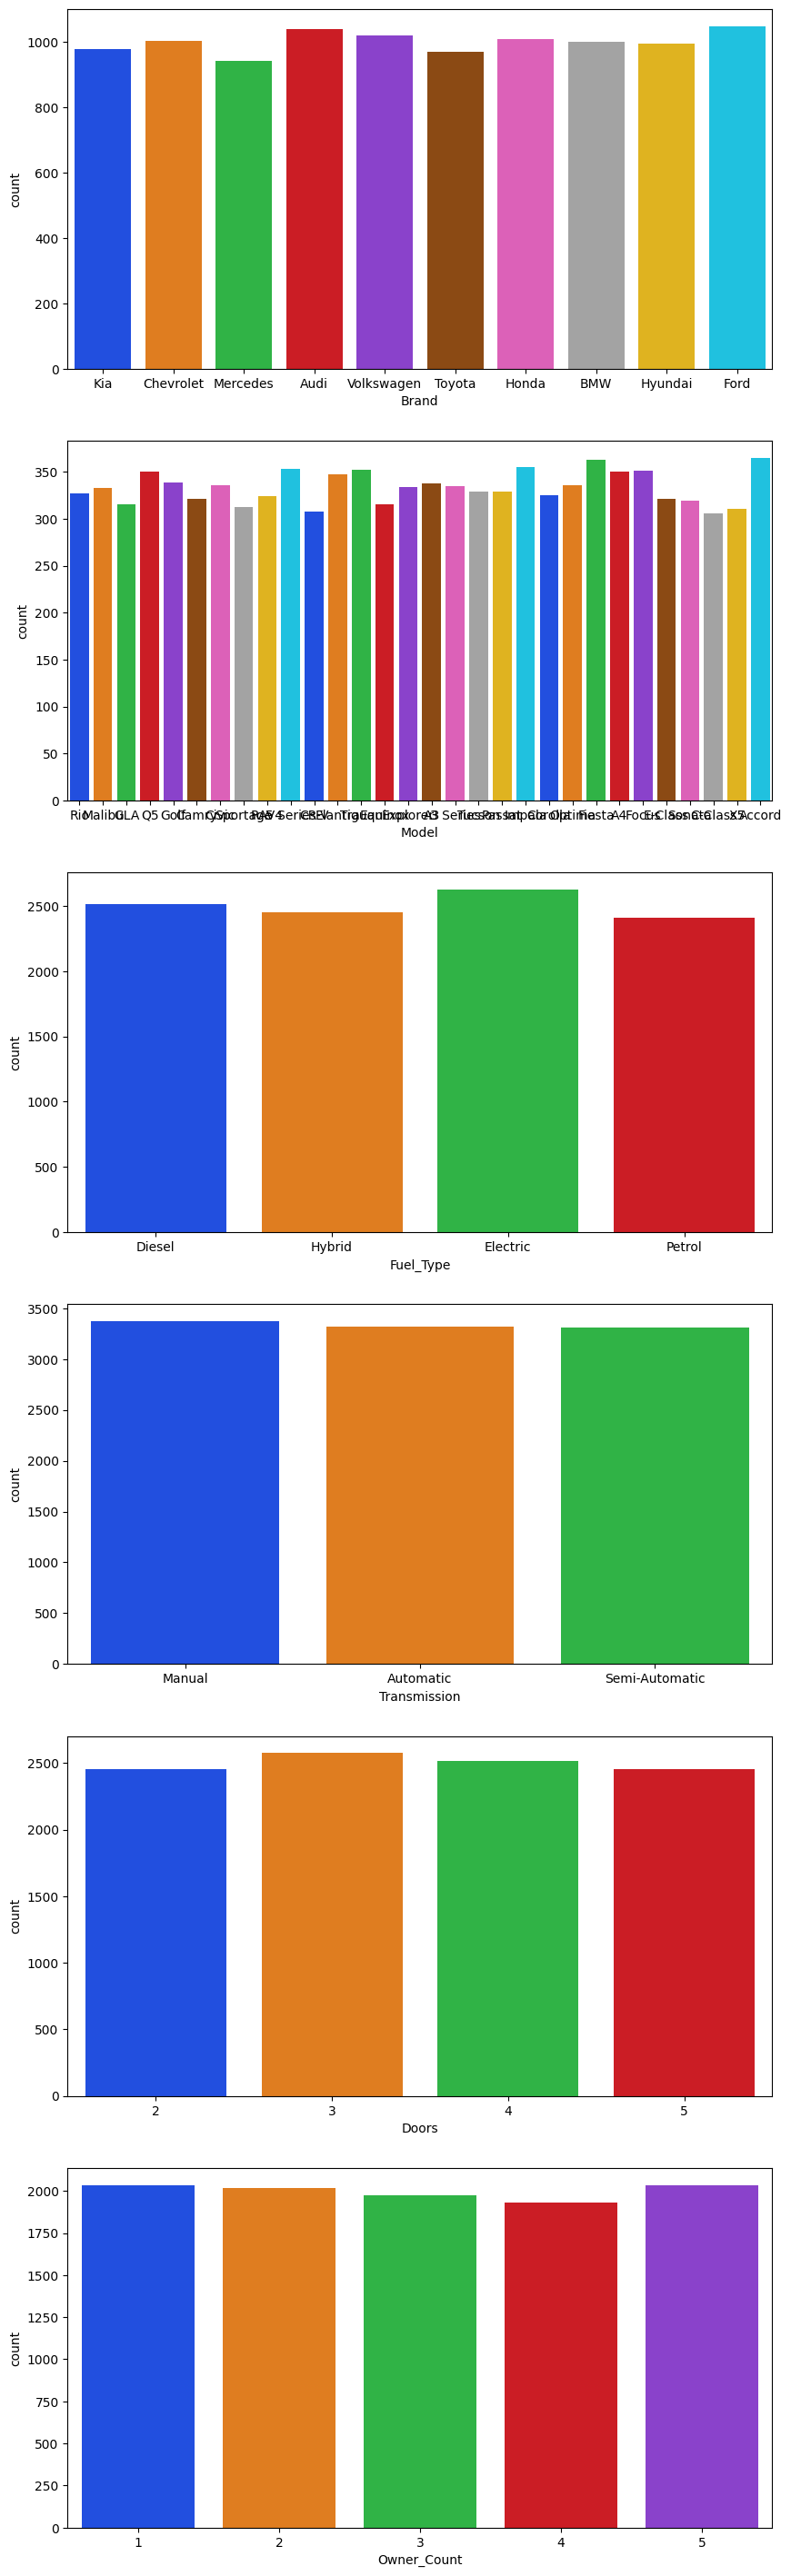

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = ['Year', 'Engine_Size'  ,'Mileage' , 'Price']
cat_cols = ['Brand' , 'Model' , 'Fuel_Type', 'Transmission', 'Doors', 'Owner_Count']

plt.figure(figsize=(10 , len(cat_cols)*len(cat_cols)))
for i,col in enumerate(cat_cols):
    plt.subplot(len(cat_cols),1,i+1)
    sns.countplot(data=data , x=col ,palette='bright')
plt.show()

Esto se hizo únicamente con el fin de visualizar mejor los datos que se tienen. A partir de las gráficas generadas, podemos observar que las variables categóricas están bastante equilibradas, lo que sugiere que no hay una clase que esté significativamente más representada que las demás.

Antes de realizar cualquier edición sobre las variables, se generó un heatmap utilizando las variables numéricas del dataset. Esto permitió visualizar la correlación entre las diferentes variables.

<Axes: >

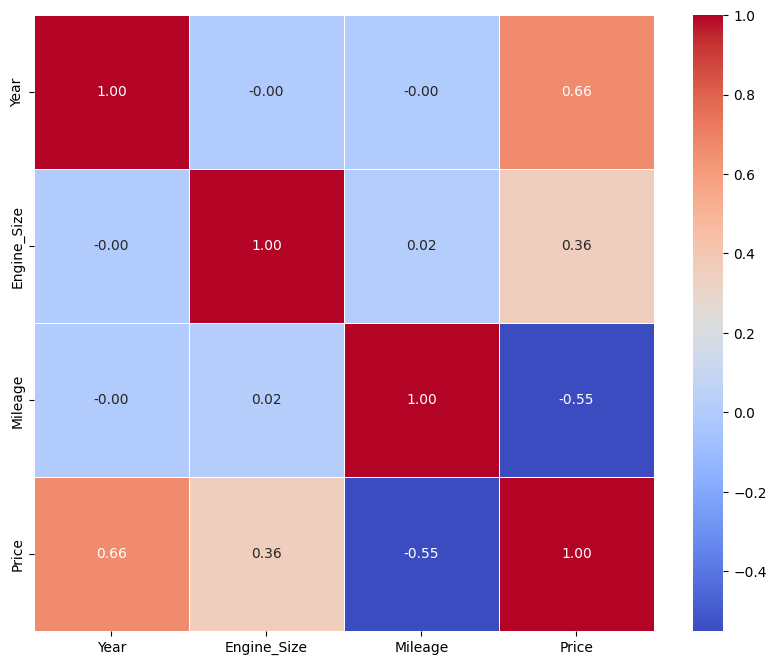

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

En esta tabla, podemos observar que "Mileage" tiene una relación negativa con el precio (nuestra variable de interés), lo que indica que a medida que el kilometraje aumenta, el precio del auto tiende a disminuir. En cambio, "Engine_Size" y "Year" presentan una relación positiva con el precio, lo que sugiere que, a medida que aumentan estos valores, el precio también lo hace. Esto tiene sentido, ya que los autos más nuevos o con motores más grandes generalmente tienen un mayor valor en el mercado.

Como se muestra en el resumen de los datos, algunas variables no numéricas podrían generar inconvenientes al ser utilizadas en modelos de predicción. Por ello, se optó por convertir estas variables categóricas en variables numéricas utilizando "one-hot encoding" mediante la función pd.get_dummies(). En este caso, se aplicó a las columnas 'Fuel_Type', 'Transmission', 'Brand' y 'Model'.

In [12]:
data = pd.get_dummies(data,columns=['Fuel_Type','Transmission','Brand','Model'],dtype='int',drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Engine_Size                  10000 non-null  float64
 2   Mileage                      10000 non-null  int64  
 3   Doors                        10000 non-null  int64  
 4   Owner_Count                  10000 non-null  int64  
 5   Price                        10000 non-null  int64  
 6   Fuel_Type_Electric           10000 non-null  int64  
 7   Fuel_Type_Hybrid             10000 non-null  int64  
 8   Fuel_Type_Petrol             10000 non-null  int64  
 9   Transmission_Manual          10000 non-null  int64  
 10  Transmission_Semi-Automatic  10000 non-null  int64  
 11  Brand_BMW                    10000 non-null  int64  
 12  Brand_Chevrolet              10000 non-null  int64  
 13  Brand_Ford       

In [13]:
data.head(10)

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,...,Model_Optima,Model_Passat,Model_Q5,Model_RAV4,Model_Rio,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5
0,2020,4.2,289944,3,5,8501,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2012,2.0,5356,2,3,12092,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,4.2,231440,4,2,11171,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023,2.0,160971,2,1,11780,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2003,2.6,286618,3,3,2867,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2007,2.7,157889,4,4,7242,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2010,3.4,139584,3,1,11208,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2001,4.7,157495,2,2,7950,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,2014,2.6,98700,3,4,9926,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
9,2005,3.1,107724,2,5,6545,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [14]:
data.size

490000

Mayores correlaciones entre columnas:
Price         Year               0.663036
Year          Price              0.663036
Model_Accord  Brand_Honda        0.581004
Brand_Honda   Model_Accord       0.581004
Model_Impala  Brand_Chevrolet    0.574594
dtype: float64


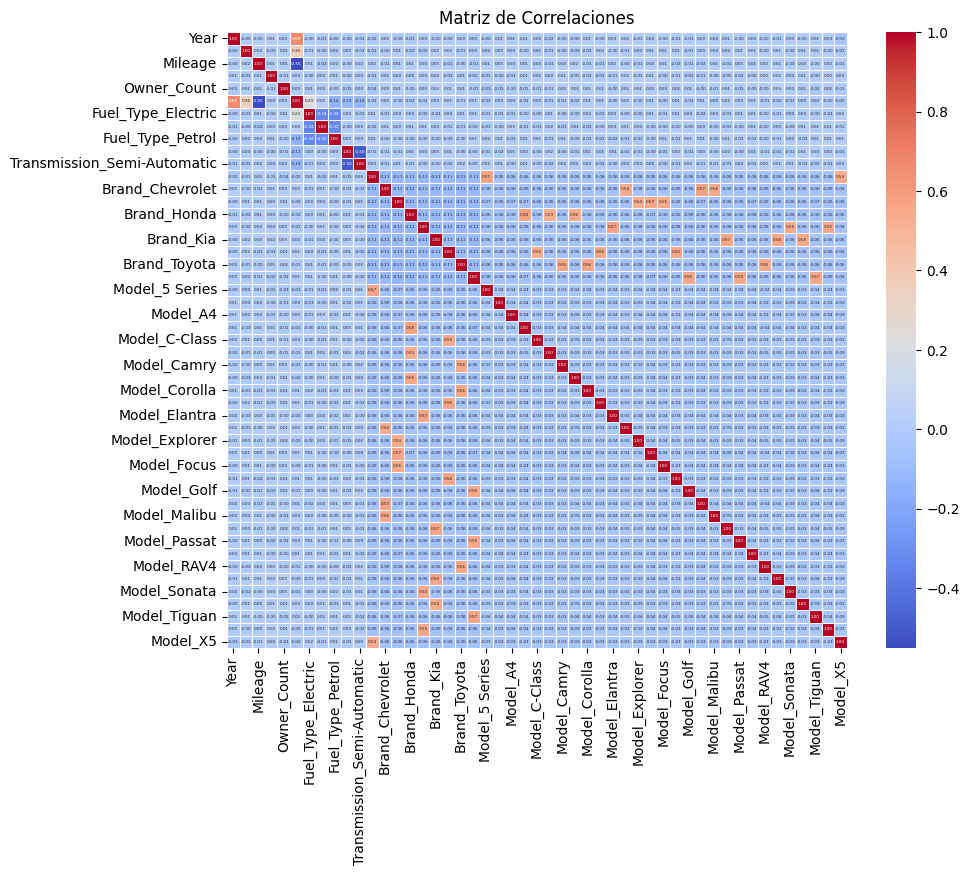

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
corr_unstacked = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool)).unstack()

sorted_corr = corr_unstacked.abs().sort_values(ascending=False)
top_correlations = sorted_corr.head(5)
print("Mayores correlaciones entre columnas:")
print(top_correlations)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,annot_kws={"size": 3})
plt.title("Matriz de Correlaciones")
plt.show()

Se generó una matriz de correlaciones utilizando las variables numéricas del dataset para examinar las relaciones entre ellas. Con la ayuda de un heatmap, se visualizó cómo se correlacionan las variables entre sí. En este caso, se observa que ninguna de las variables tiene una correlación suficientemente alta con otras, lo que significa que no es necesario eliminar ninguna variable debido a multicolinealidad.

In [17]:
data.isnull().sum()

,0
Year,0
Engine_Size,0
Mileage,0
Doors,0
Owner_Count,0
Price,0
Fuel_Type_Electric,0
Fuel_Type_Hybrid,0
Fuel_Type_Petrol,0
Transmission_Manual,0


In [18]:
data.duplicated().sum()

0

Se verificó que no hubiera valores duplicados en el dataset para asegurar que los datos fueran únicos y evitar que afectaran el rendimiento del modelo.

Se utilizó el método de Tukey para detectar posibles valores atípicos (outliers) en las variables numéricas. Este método se basa en el rango intercuartílico (IQR), utilizando un factor multiplicador de 3 para identificar los valores fuera del rango establecido por el cuartil 1 (Q1) y cuartil 3 (Q3).

In [19]:
import numpy as np
for col in num_cols:
    q1 = np.quantile(data[col].dropna(), 0.25)
    q3 = np.quantile(data[col].dropna(), 0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"\nValores atípicos detectados en '{col}' usando el método de Tukey (k=3):")
    print(outliers)


Valores atípicos detectados en 'Year' usando el método de Tukey (k=3):
Empty DataFrame
Columns: [Year, Engine_Size, Mileage, Doors, Owner_Count, Price, Fuel_Type_Electric, Fuel_Type_Hybrid, Fuel_Type_Petrol, Transmission_Manual, Transmission_Semi-Automatic, Brand_BMW, Brand_Chevrolet, Brand_Ford, Brand_Honda, Brand_Hyundai, Brand_Kia, Brand_Mercedes, Brand_Toyota, Brand_Volkswagen, Model_5 Series, Model_A3, Model_A4, Model_Accord, Model_C-Class, Model_CR-V, Model_Camry, Model_Civic, Model_Corolla, Model_E-Class, Model_Elantra, Model_Equinox, Model_Explorer, Model_Fiesta, Model_Focus, Model_GLA, Model_Golf, Model_Impala, Model_Malibu, Model_Optima, Model_Passat, Model_Q5, Model_RAV4, Model_Rio, Model_Sonata, Model_Sportage, Model_Tiguan, Model_Tucson, Model_X5]
Index: []

[0 rows x 49 columns]

Valores atípicos detectados en 'Engine_Size' usando el método de Tukey (k=3):
Empty DataFrame
Columns: [Year, Engine_Size, Mileage, Doors, Owner_Count, Price, Fuel_Type_Electric, Fuel_Type_Hybri

Como se puede observar, no se detectaron outliers en nuestro dataset (yay!!!)

El código usa SelectKBest con f_regression para seleccionar las mejores variables predictoras, asegurando que el número de variables seleccionadas no supere el total disponible.

In [48]:
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression

X = sm.add_constant(data.drop(columns=['Price']))
y = data['Price']

k = min(10, X.shape[1] - 1)
selector = SelectKBest(f_regression, k=k).fit(X.iloc[:, 1:], y)
X_selected = X.iloc[:, 1:].loc[:, selector.get_support()]
X_selected = sm.add_constant(X_selected)

print("\nCantidad de variables antes de la selección:", X.shape[1])
print("Número de variables seleccionadas:", len(X_selected.columns))
print("Variables seleccionadas:", list(X_selected.columns))


Cantidad de variables antes de la selección: 49
Número de variables seleccionadas: 11
Variables seleccionadas: ['const', 'Year', 'Engine_Size', 'Mileage', 'Fuel_Type_Electric', 'Fuel_Type_Hybrid', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Transmission_Semi-Automatic', 'Brand_Honda', 'Model_Civic']


In [38]:
X = X_selected.drop(columns=['const'])
y = data['Price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

p_values_aligned = model.pvalues.copy()
p_values_aligned = p_values_aligned[X.columns]
X_selected = X.loc[:, p_values_aligned <= 0.05]
print("\nCantidad de variables antes de la selección:", X.shape[1])
print("Cantidad de variables después de la selección:", X_selected.shape[1])
print("Variables seleccionadas:", list(X_selected.columns))


Cantidad de variables antes de la selección: 11
Cantidad de variables después de la selección: 8
Variables seleccionadas: ['const', 'Year', 'Engine_Size', 'Mileage', 'Fuel_Type_Electric', 'Fuel_Type_Hybrid', 'Transmission_Manual', 'Transmission_Semi-Automatic']


Este código ajusta un modelo OLS con las variables seleccionadas previamente y luego filtra las variables cuyo p-valor es menor o igual a 0.05, seleccionando solo las que tienen una relación significativa con la variable dependiente. Se puede ver que pasamos de tener 49 variables a tener solo 8, que hace que nuestro modelo sea mucho más simple.

Se dividieron los datos en un conjunto de entrenamiento y otro de prueba (70% y 30% respectivamente), luego se añadió una constante a las variables de entrada para ajustar el modelo de regresión lineal. Se entrenó un modelo de regresión lineal usando el método de mínimos cuadrados ordinarios (OLS) con los datos de entrenamiento.

In [39]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = X_selected.drop(columns=['const'])
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model_lr = sm.OLS(y_train, X_train_const).fit()

print(model_lr.summary())
y_pred_lr = model_lr.predict(X_test_const)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.140e+06
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:35:19   Log-Likelihood:                -41634.
No. Observations:                7000   AIC:                         8.328e+04
Df Residuals:                    6992   BIC:                         8.334e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Todos los p-values de las variables son extremadamente bajos, lo que indica que estas variables son altamente significativas para predecir el precio del automóvil.

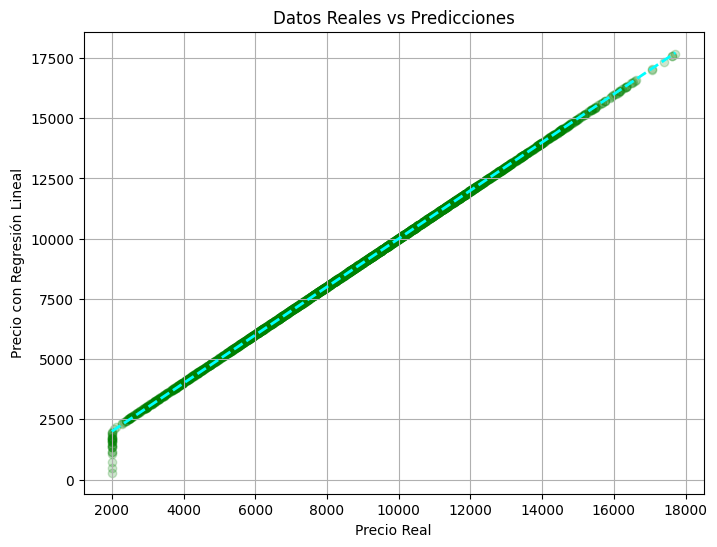

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, color='green', alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='cyan', linestyle='--', linewidth=2, label='Línea de referencia')

plt.title("Datos Reales vs Predicciones")
plt.xlabel("Precio Real")
plt.ylabel("Precio con Regresión Lineal")
plt.grid(True)
plt.show()

Se implementó el modelo K-Nearest Neighbors (KNN) para regresión, que es un modelo no lineal. Primero, se dividieron los datos en un conjunto de entrenamiento y otro de prueba, utilizando un 30% de los datos para las pruebas. Luego, se creó el modelo KNN con 5 vecinos cercanos y se entrenó con el conjunto de entrenamiento.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


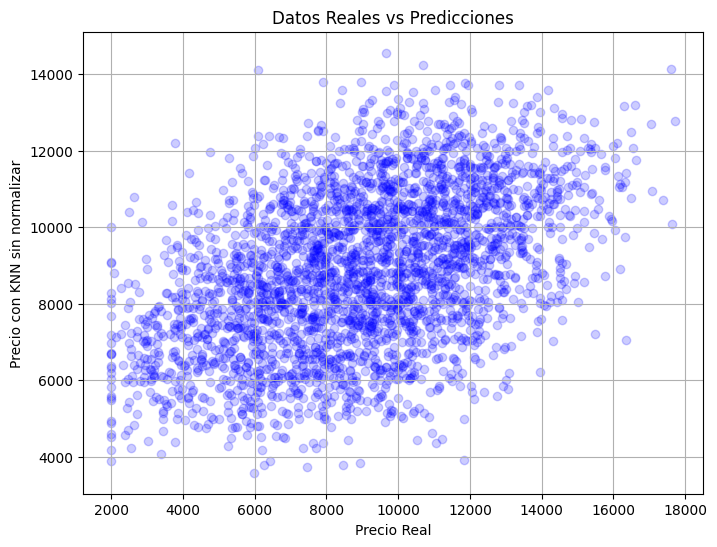

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.2)

plt.title("Datos Reales vs Predicciones")
plt.xlabel("Precio Real")
plt.ylabel("Precio con KNN sin normalizar")
plt.grid(True)
plt.show()

Se realiza la normalización de los datos antes de aplicar el modelo K-Nearest Neighbors (KNN). Primero, se utiliza StandardScaler. Esto se hace para el conjunto de entrenamiento (X_train) y el conjunto de prueba (X_test) de manera que las características estén en una escala comparable. Luego, se entrena un nuevo modelo KNN con los datos estandarizados.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsRegressor(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)

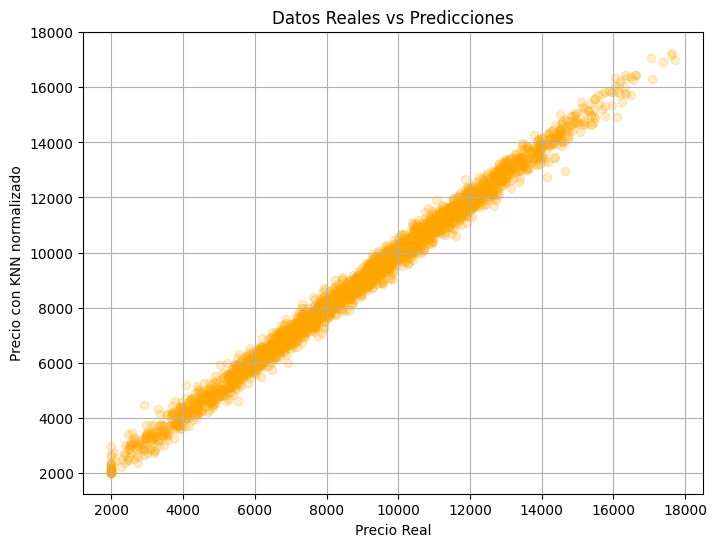

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_scaled, color='orange', alpha=0.2)

plt.title("Datos Reales vs Predicciones")
plt.xlabel("Precio Real")
plt.ylabel("Precio con KNN normalizado")
plt.grid(True)
plt.show()

Se calculan y comparan varias métricas de evaluación, como el Error Cuadrático Medio (MSE), el Coeficiente de Determinación (R²) y la Raíz del Error Cuadrático Medio (RMSE), para los tres modelos: Regresión Lineal, KNN sin normalizar y KNN normalizado.

In [49]:
from sklearn.metrics import r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_knn = mean_squared_error(y_test, y_pred)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
r2_knn = r2_score(y_test, y_pred)
r2_scaled = r2_score(y_test, y_pred_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f"MSE Regresión Lineal: {mse_lr:.2f}")
print(f"R² Regresión Lineal: {r2_lr:.4f}")
print("RMSE Regresión Lineal:", rmse_lr)
print(f"MSE KNN sin normalizar: {mse_knn:.2f}")
print(f"R² KNN sin normalizar: {r2_knn:.4f}")
print("RMSE KNN sin normalizar:", rmse_knn)
print(f"MSE KNN normalizado: {mse_scaled:.2f}")
print(f"R² KNN normalizado: {r2_scaled:.4f}")
print("RMSE KNN normalizado:", rmse_scaled)

MSE Regresión Lineal: 4488.27
R² Regresión Lineal: 0.9995
RMSE Regresión Lineal: 66.99453116749054
MSE KNN sin normalizar: 7830748.01
R² KNN sin normalizar: 0.1672
RMSE KNN sin normalizar: 2798.34737111746
MSE KNN normalizado: 83263.93
R² KNN normalizado: 0.9911
RMSE KNN normalizado: 288.5549015814264


La regresión lineal muestra el mejor desempeño con un R² de 0.9995, lo que significa que el modelo explica el 99.95% de la variabilidad de los precios de los autos, con un RMSE de 66.99, indicando una baja desviación promedio en las predicciones. En comparación, el modelo KNN sin normalizar presenta un R² de 0.1672, lo que indica un ajuste deficiente, explicando solo el 16.72% de la variabilidad, con un RMSE mucho mayor de 2798.35. Al aplicar normalización en el KNN, el rendimiento mejora significativamente con un R² de 0.9911 y un RMSE de 288.55, aunque sigue siendo inferior al desempeño de la regresión lineal.

Una vez que el modelo de regresión fue ajustado, se llevó a cabo un análisis de inferencia de los resultados obtenidos:

In [46]:
X = X_selected.drop(columns=['const'])
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model_lr = sm.OLS(y_train, X_train_const).fit()

print(model_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.140e+06
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:36:00   Log-Likelihood:                -41634.
No. Observations:                7000   AIC:                         8.328e+04
Df Residuals:                    6992   BIC:                         8.334e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

En términos generales, el modelo es altamente preciso, con un coeficiente de determinación R² = 0.999, lo que indica que el 99.9% de la variabilidad en los precios de los automóviles se explica mediante las variables incluidas en el modelo. Solo un 0.1% de la variabilidad en los precios no se puede explicar, lo que sugiere que factores externos o no considerados pueden estar influyendo en el precio de los autos.

El año del auto (Year) tiene un coeficiente de 298.46, lo que significa que por cada año adicional, el precio del automóvil aumenta en aproximadamente $298.46 USD. Su intervalo de confianza al 95% es [298.15, 298.78], lo que indica que estamos altamente seguros de que el verdadero impacto del año en el precio del automóvil se encuentra dentro de este rango.

El kilometraje (Mileage) tiene un coeficiente de -0.0199, lo que indica que por cada milla adicional recorrida, el precio del automóvil disminuye en $0.0199 USD. Su intervalo de confianza es [-0.0203, -0.0195], lo que confirma que hay una relación negativa entre el kilometraje y el precio.

El tamaño del motor (Engine_Size) tiene un coeficiente de $992.09 USD por litro, lo que significa que un motor más grande generalmente aumenta el precio del auto.

El tipo de combustible (Fuel_Type) se trata como una variable categórica, con la gasolina como la categoría base. Para los autos eléctricos, el coeficiente es $1,986.08 USD, lo que sugiere que, en promedio, un automóvil eléctrico es más costoso que uno de gasolina.

Para los autos híbridos, el coeficiente es $988.52 USD, indicando que los autos híbridos también son más costosos que los de gasolina, pero en menor medida que los eléctricos.

Los coeficientes obtenidos confirman que factores como el año de fabricación, el tamaño del motor y el tipo de combustible son determinantes clave en la fijación de precios de los automóviles.

Con esta información, podemos inferir diferentes cosas:
- **La antigüedad del vehículo influye directamente en su precio:** los vehículos más recientes tienden a tener un precio más alto en comparación con los modelos más antiguos. A medida que un automóvil envejece, su depreciación reduce su valor de mercado, lo que explica la relación positiva entre el año de fabricación y el precio.
- **El tipo de transmisión afecta su valor:** los autos con transmisión automática suelen ser más costosos que aquellos con transmisión manual o semi-automática. Los autos manuales, aunque pueden ser más eficientes en ciertos casos, son menos populares, lo que explica su menor valor en el mercado.
- **Los autos eléctricos e híbridos son considerados mejores:** los vehículos eléctricos y los híbridos tienen precios más altos en comparación con los autos de combustión interna.











